# <center>Analizar una Base de Datos de Perros<center>

Obtener un dataset que contiene información sobre razas de perros ("breeds") y crear visualizaciones que permitan responder preguntas como ¿Cuál es la expectativa de vida? ¿Cuál es el temperamento más frecuente?

1. Implementar la API
2. Análisis Exploratorio
3. Limpieza de datos
4. Creación de gráficos

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Implementar API

In [2]:
url = 'https://api.thedogapi.com/v1/breeds'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
df

,weight,height,id,name,bred_for,breed_group,life_span,temperament,origin,reference_image_id,country_code,description,history
0,"{'imperial': '6 - 13', 'metric': '3 - 6'}","{'imperial': '9 - 11.5', 'metric': '23 - 29'}",1,Affenpinscher,"Small rodent hunting, lapdog",Toy,10 - 12 years,"Stubborn, Curious, Playful, Adventurous, Activ...","Germany, France",BJa4kxc4X,NaN,NaN,NaN
1,"{'imperial': '50 - 60', 'metric': '23 - 27'}","{'imperial': '25 - 27', 'metric': '64 - 69'}",2,Afghan Hound,Coursing and hunting,Hound,10 - 13 years,"Aloof, Clownish, Dignified, Independent, Happy","Afghanistan, Iran, Pakistan",hMyT4CDXR,AG,NaN,NaN
2,"{'imperial': '44 - 66', 'metric': '20 - 30'}","{'imperial': '30', 'metric': '76'}",3,African Hunting Dog,A wild pack animal,NaN,11 years,"Wild, Hardworking, Dutiful",,rkiByec47,NaN,NaN,NaN
3,"{'imperial': '40 - 65', 'metric': '18 - 29'}","{'imperial': '21 - 23', 'metric': '53 - 58'}",4,Airedale Terrier,"Badger, otter hunting",Terrier,10 - 13 years,"Outgoing, Friendly, Alert, Confident, Intellig...","United Kingdom, England",1-7cgoZSh,NaN,NaN,NaN
4,"{'imperial': '90 - 120', 'metric': '41 - 54'}","{'imperial': '28 - 34', 'metric': '71 - 86'}",5,Akbash Dog,Sheep guarding,Working,10 - 12 years,"Loyal, Independent, Intelligent, Brave",,26pHT3Qk7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,"{'imperial': '15 - 19', 'metric': '7 - 9'}","{'imperial': '13 - 16', 'metric': '33 - 41'}",259,Wire Fox Terrier,"Vermin hunting, fox bolting",NaN,13 – 14 years,"Fearless, Friendly, Bold, Keen, Alert, Quick",NaN,SJ6f2g9EQ,NaN,NaN,England
168,"{'imperial': '45 - 70', 'metric': '20 - 32'}","{'imperial': '20 - 24', 'metric': '51 - 61'}",260,Wirehaired Pointing Griffon,"Gundog, ""swamp-tromping"", Flushing, pointing, ...",Sporting,12 - 14 years,"Loyal, Gentle, Vigilant, Trainable, Proud",NaN,Bkam2l9Vm,NaN,NaN,NaN
169,"{'imperial': '45 - 65', 'metric': '20 - 29'}","{'imperial': '21.5 - 25', 'metric': '55 - 64'}",261,Wirehaired Vizsla,NaN,Sporting,12 - 14 years,NaN,NaN,r1I4hl5Em,NaN,NaN,NaN
170,"{'imperial': '9 - 31', 'metric': '4 - 14'}","{'imperial': '10 - 23', 'metric': '25 - 58'}",262,Xoloitzcuintli,NaN,Non-Sporting,12 - 14 years,"Cheerful, Alert, Companionable, Intelligent, P...",NaN,HkNS3gqEm,NaN,NaN,NaN


### Análisis Exploratorio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weight              172 non-null    object
 1   height              172 non-null    object
 2   id                  172 non-null    int64 
 3   name                172 non-null    object
 4   bred_for            151 non-null    object
 5   breed_group         156 non-null    object
 6   life_span           172 non-null    object
 7   temperament         168 non-null    object
 8   origin              5 non-null      object
 9   reference_image_id  172 non-null    object
 10  country_code        12 non-null     object
 11  description         1 non-null      object
 12  history             2 non-null      object
dtypes: int64(1), object(12)
memory usage: 17.6+ KB


In [4]:
df.describe()

,id
count,172.000000
mean,125.505814
std,81.121200
min,1.000000
25%,53.750000
50%,120.500000
75%,201.750000
max,264.000000


### Limpieza de datos

In [5]:
numeros = []
for span in df['life_span']:
    numeros.append(int(span.split()[0]))

df['life_span'] = numeros

In [7]:
columnas = ['life_span', 'temperament']
df = df[columnas]
df

,life_span,temperament
0,10,"Stubborn, Curious, Playful, Adventurous, Activ..."
1,10,"Aloof, Clownish, Dignified, Independent, Happy"
2,11,"Wild, Hardworking, Dutiful"
3,10,"Outgoing, Friendly, Alert, Confident, Intellig..."
4,10,"Loyal, Independent, Intelligent, Brave"
...,...,...
167,13,"Fearless, Friendly, Bold, Keen, Alert, Quick"
168,12,"Loyal, Gentle, Vigilant, Trainable, Proud"
169,12,NaN
170,12,"Cheerful, Alert, Companionable, Intelligent, P..."


### Gráficos

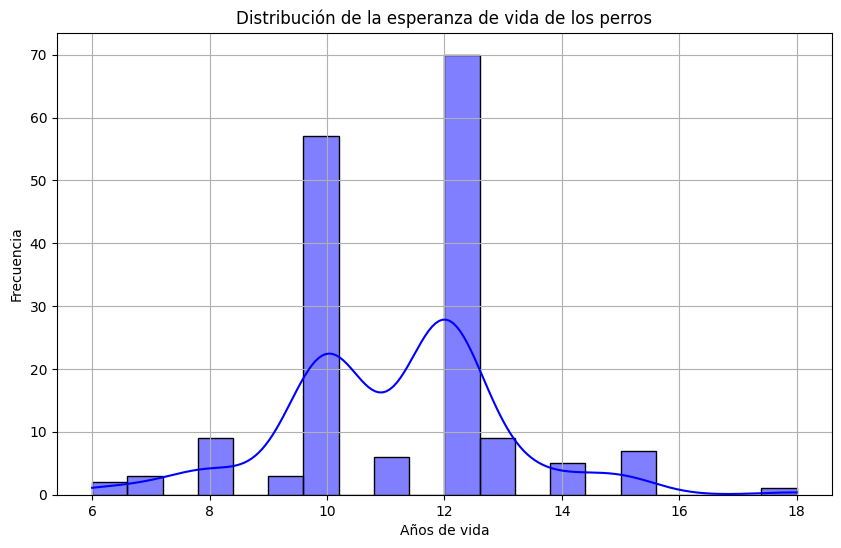

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['life_span'], bins=20, color='blue', kde=True)
plt.title('Distribución de la esperanza de vida de los perros')
plt.xlabel('Años de vida')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

El temperamente más frecuente es  Intelligent con 92 apariciones.


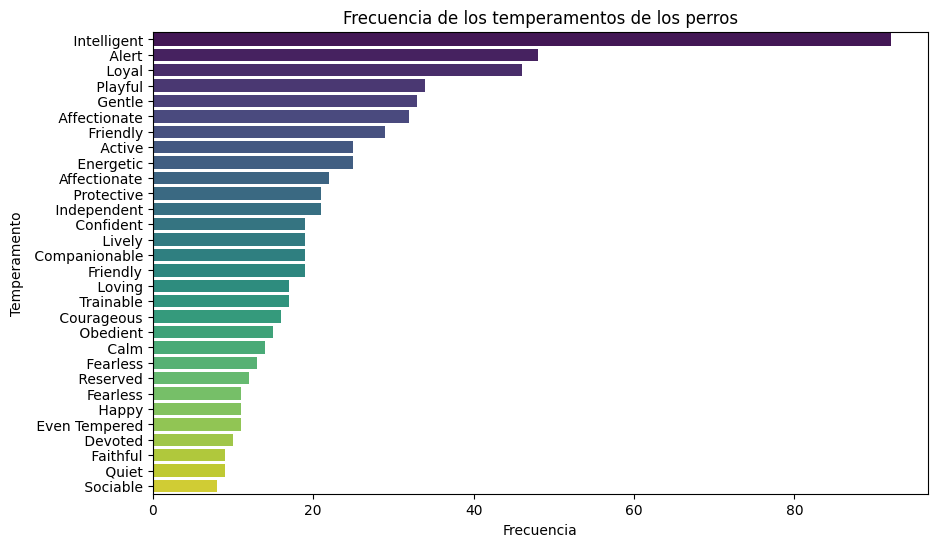

In [15]:
# Dividir temperamentos en una lista
temperamentos = []
for i in df['temperament'].dropna().str.split(','):
    for temperamento in i:
        temperamentos.append(temperamento)

# Contar la frecuencia de cada temperamento
frecuencia = pd.Series(temperamentos).value_counts().head(30).reset_index()
frecuencia.columns = ['temperamento', 'frecuencia']
frecuencia

print(f'El temperamente más frecuente es {frecuencia.iloc[0, 0]} con {frecuencia.iloc[0, 1]} apariciones.')

# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='frecuencia', y='temperamento', data=frecuencia, palette='viridis', hue='temperamento')
plt.title('Frecuencia de los temperamentos de los perros')
plt.xlabel('Frecuencia')
plt.ylabel('Temperamento')
plt.show()